**Import and display testing data from the Firestore database**

In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

import pandas as pd
import datetime
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Firestore setup

In [2]:
cred = credentials.Certificate('skripsie-1e23a-firebase-adminsdk-slyrk-4b6e4e2dfa.json')
app = firebase_admin.initialize_app(cred)
db = firestore.client()

Import data from Firestore and optionally save it to a .csv file. Importing the data is slow, saving it to the csv file saves time when the data is needed again

In [3]:
def dataFromFirebase():
    data = []
    
    for i in range(10, 255):
        doc_ref = db.collection("data").document("rec"+str(i))

        doc = doc_ref.get()
    
        if doc.exists:
            soil = doc.get("soil")
            uv = doc.get("uv")
            timestamp = doc.get("timestamp")
            date = datetime.datetime.fromtimestamp(int(timestamp))
            data.append([soil, uv, timestamp, date])
        else:
            print("No such document!")
            
    df = pd.DataFrame(data, columns=['soil', 'uv', 'timestamp', 'date'])
    # df.to_csv('firestore_data.csv', index=False)
    return df

Read the data from the .csv file

In [4]:
def dataFromFile():
    df = pd.read_csv('firestore_data.csv')
    return df

Display the data

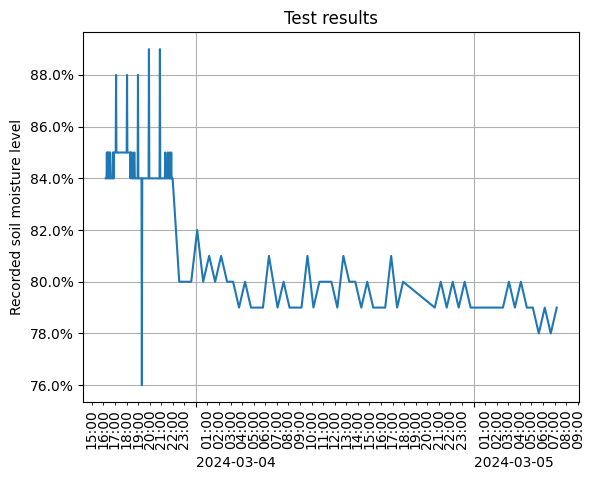

In [5]:
# df = dataFromFirebase()
df = dataFromFile()
df['date'] = pd.to_datetime(df['date'])

# Plot
fig, ax = plt.subplots()
ax.plot('date', 'soil', data=df)
ax.set_title("Test results")
ax.set_ylabel("Recorded soil moisture level")

ax.yaxis.set_major_formatter('{x}%')

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

for label in ax.get_xticklabels(which='minor'):
    label.set(rotation=90)
for label in ax.get_xticklabels(which='major'):
    label.set(horizontalalignment='left', y = -0.12)

plt.grid()

# plt.savefig('test_results.png')